# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [11]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [37]:
# Cell type : CodeWrite

def pdf_multivariate_gaussian(X, mu, cov):
    """Computes the probability density function of the multivariate Gaussian distribution.

    Arguments:
    X : numpy array of shape (d,)
    mu: numpy array of shape (d,)
    cov: numpy array of shape (d,d)

    Returns:
    p : probability density function of the multivariate Gaussian distribution

    """
    assert(X.shape == mu.shape) # check if the dimensions of X and mu are same
    assert(cov.shape[0] == cov.shape[1]) # check if cov is a square matrix

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    assert(detCov != 0) # check if the determinant of cov is non-zero
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.matmul(np.matmul((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]

    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)

    cov = np.eye(X_train.shape[1])

    prob_pos = np.array([pdf_multivariate_gaussian(X_test[i], mu_pos, cov) for i in range(X_test.shape[0])])
    prob_neg = np.array([pdf_multivariate_gaussian(X_test[i], mu_neg, cov) for i in range(X_test.shape[0])])
    Y_test_pred = np.array([1 if prob_pos[i] * a > prob_neg[i] * (1-a) else -1 for i in range(X_test.shape[0])])

    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]

    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)

    cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(X_train.shape[0]):
        temp1 = np.array([X_train[i] - mu_pos])
        temp2 = np.array([X_train[i] - mu_neg])
        if Y_train[i] == 1:
            cov += np.matmul(np.transpose(temp1), temp1)
        else:
            cov += np.matmul(np.transpose(temp2), temp2)

    cov /= X_train.shape[0]

    prob_pos = np.array([pdf_multivariate_gaussian(X_test[i], mu_pos, cov) for i in range(X_test.shape[0])])
    prob_neg = np.array([pdf_multivariate_gaussian(X_test[i], mu_neg, cov) for i in range(X_test.shape[0])])
    Y_test_pred = np.array([1 if prob_pos[i] * a > prob_neg[i] * (1-a) else -1 for i in range(X_test.shape[0])])

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]

    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)

    cov_pos = np.zeros((X_train.shape[1], X_train.shape[1]))
    cov_neg = np.zeros((X_train.shape[1], X_train.shape[1]))

    for i in range(X_train.shape[0]): 
        temp1 = np.array([X_train[i] - mu_pos])
        temp2 = np.array([X_train[i] - mu_neg])
    
        if Y_train[i] == 1:
            cov_pos += np.matmul(np.transpose(temp1), temp1)
        else:
            cov_neg += np.matmul(np.transpose(temp2), temp2)

    cov_pos /= pos_count
    cov_neg /= (X_train.shape[0] - pos_count)

    prob_pos = np.array([pdf_multivariate_gaussian(X_test[i], mu_pos, cov_pos) for i in range(X_test.shape[0])])
    prob_neg = np.array([pdf_multivariate_gaussian(X_test[i], mu_neg, cov_neg) for i in range(X_test.shape[0])])
    Y_test_pred = np.array([1 if prob_pos[i] * a > prob_neg[i] * (1-a) else -1 for i in range(X_test.shape[0])])

    return Y_test_pred

In [38]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
print("Accuracy 1a: ", np.sum(Y_pred_test_1a == Y_test)/Y_test.shape[0])
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
print("Accuracy 1b: ", np.sum(Y_pred_test_1b == Y_test)/Y_test.shape[0])
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
print("Accuracy 1c: ", np.sum(Y_pred_test_1c == Y_test)/Y_test.shape[0])

Accuracy 1a:  0.8555
Accuracy 1b:  0.8555
Accuracy 1c:  0.856


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


Dataset1_1 Error 1a: 0.126 Error 1b: 0.1245 Error 1c: 0.1245


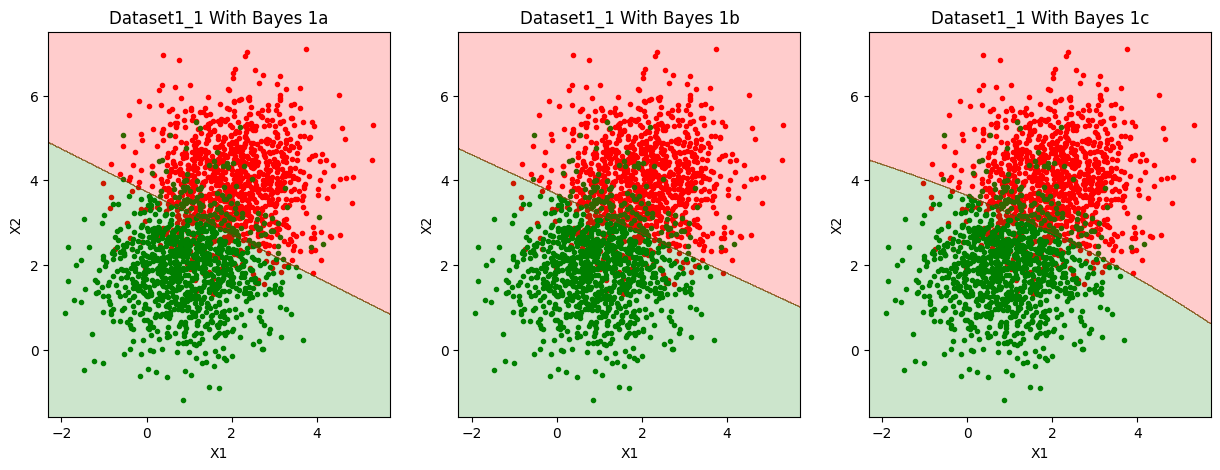

Dataset1_2 Error 1a: 0.0085 Error 1b: 0.0 Error 1c: 0.0


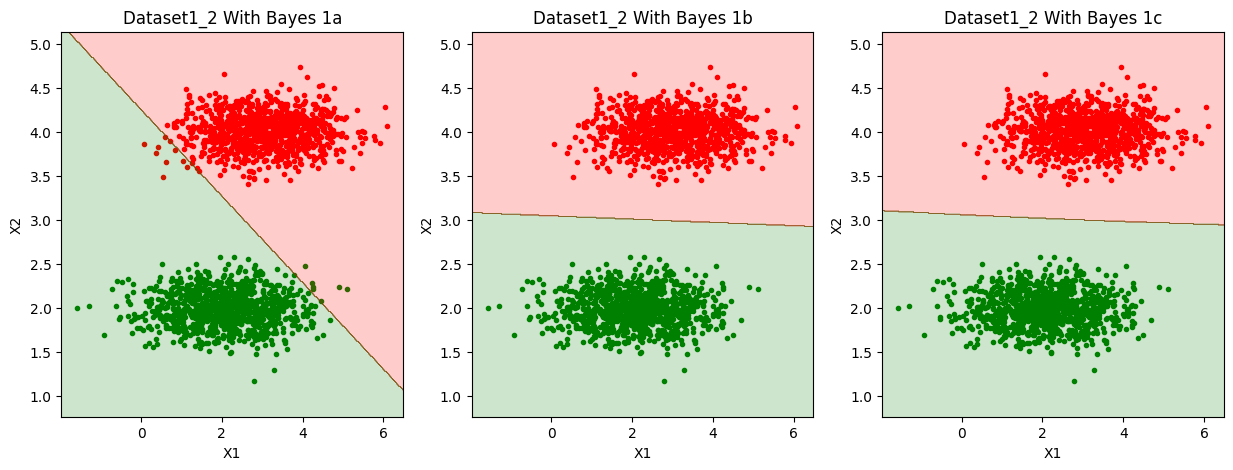

Dataset1_3 Error 1a: 0.497 Error 1b: 0.495 Error 1c: 0.135


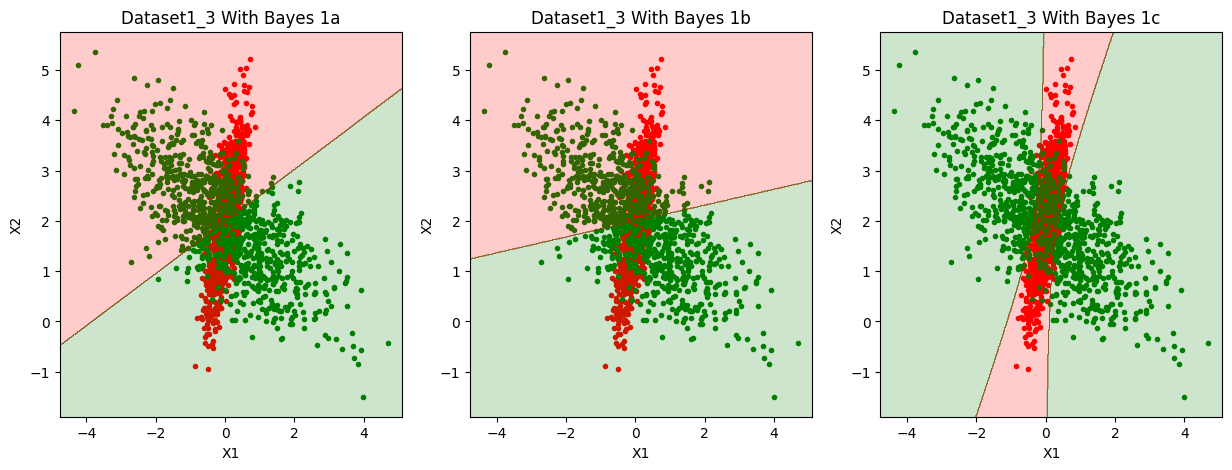

In [28]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
markers = ['.', '.']
colors = ['r', 'g'] # red for class -1, green for class 1

for i in range(1, 4):
    plt.subplots(1, 3, figsize=(15, 5))
    filename = 'dataset1_' + str(i) + '.npz'
    data = np.load(filename)

    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_test_pred1 = Bayes1a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes1b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes1c(X_train, Y_train, X_test)

    print("Dataset1_" + str(i), end="")
    print(" Error 1a:", (Y_test.shape[0] - np.sum(Y_test_pred1 == Y_test))/Y_test.shape[0], end ="")
    print(" Error 1b:", (Y_test.shape[0] - np.sum(Y_test_pred2 == Y_test))/Y_test.shape[0], end="")
    print(" Error 1c:", (Y_test.shape[0] - np.sum(Y_test_pred3 == Y_test))/Y_test.shape[0])

    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    size = 500
    X, Y = np.meshgrid(np.linspace(min_X-0.4, max_X+0.4, size), np.linspace(min_Y-0.4, max_Y+0.4, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]

    plt.subplot(1, 3, 1)
    plt.title("Dataset1_" + str(i) + " With Bayes 1a")
    for j in range(2):
        plt.scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])
    
    Z = Bayes1a(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    plt.subplot(1, 3, 2)
    plt.title("Dataset1_" + str(i) + " With Bayes 1b")
    for j in range(2):
        plt.scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1b(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    plt.subplot(1, 3, 3)
    plt.title("Dataset1_" + str(i) + " With Bayes 1c")
    for j in range(2):
        plt.scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1c(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)
    plt.show()


** Cell type : TextWrite ** 

# Problem 1
## Error Table
| Dataset | Bayes1a | Bayes1b | Bayes1c |
|---------|---------|---------|---------|
| 1_1     |  0.126  |  0.1245 |  0.1245 |
| 1_2     |  0.0085 |   0.0   |   0.0   |
| 1_3     |  0.497  |  0.495  |  0.135  |

## Observations
1. The Bayes1c classifier is the best among the 3 classifiers. It takes less number of assumptions and extracts all the information from the data itself.
2. This classifier works well in the third dataset where the covariances of the 2 data classes are different. The other 2 classifiers fail to classify the data properly.

3. The Bayes1b classifier works better than the Bayes1a classifier in the second dataset where the covariances of the 2 data classes are same but not identity.

4. The Bayes1a classifier works better than the Bayes1b classifier in the first dataset where the covariances of the 2 data classes identity matrices. Even if we are able to find the covariance via Maximum Likelihood estimator, due to the randomness in the data we aren't able to get the same performance as the Bayes1a classifier in the dataset 1.

### Bayes1a < Bayes1b < Bayes1c



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [29]:
# Cell type : CodeWrite
# Fill in functions in this cell

loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def pdf_multivariate_gaussian(X, mu, cov):
    """Computes the probability density function of the multivariate Gaussian distribution.

    Arguments:
    X : numpy array of shape (d,)
    mu: numpy array of shape (d,)
    cov: numpy array of shape (d,d)

    Returns:
    p : probability density function of the multivariate Gaussian distribution

    """
    assert(X.shape == mu.shape)
    assert(cov.shape[0] == cov.shape[1])

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    assert(detCov != 0)
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.matmul(np.matmul((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_arr = [X_train[Y_train == i] for i in range(1, 5)]
    mu_arr = [np.mean(X_train_arr[i], axis=0) for i in range(4)]
    prob_arr = [X_train_arr[i].shape[0]/X_train.shape[0] for i in range(4)]
    
    cov = np.eye(X_train.shape[1])
    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        error = [0, 0, 0, 0]
        for j in range(4):   
            for k in range(4):
                error[j] += loss_matrix[k][j] * prob_arr[k] * pdf_multivariate_gaussian(X_test[i], mu_arr[k], cov)
    
        Y_test_pred[i] = np.argmin(error) + 1

    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_arr = [X_train[Y_train == i] for i in range(1, 5)]
    mu_arr = [np.mean(X_train_arr[i], axis=0) for i in range(4)]
    prob_arr = [X_train_arr[i].shape[0]/X_train.shape[0] for i in range(4)]
    
    cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    Y_test_pred = np.zeros(X_test.shape[0])
    
    for i in range(X_train.shape[0]):
        temp = np.array([X_train[i] - mu_arr[int(Y_train[i])-1]])
        cov += np.matmul(np.transpose(temp), temp)
    
    cov /= X_train.shape[0]

    for i in range(X_test.shape[0]):
        error = [0, 0, 0, 0]
        for j in range(4):   
            for k in range(4):
                error[j] += loss_matrix[k][j] * prob_arr[k] * pdf_multivariate_gaussian(X_test[i], mu_arr[k], cov)
    
        Y_test_pred[i] = np.argmin(error) + 1

    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_arr = [X_train[Y_train == i] for i in range(1, 5)]
    mu_arr = [np.mean(X_train_arr[i], axis=0) for i in range(4)]
    prob_arr = [X_train_arr[i].shape[0]/X_train.shape[0] for i in range(4)]
    
    cov = []
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(4):
        cov.append(np.zeros((X_train.shape[1], X_train.shape[1])))
        for j in range(X_train_arr[i].shape[0]):
            temp = np.array([X_train_arr[i][j] - mu_arr[i]])
            cov[i] += np.matmul(np.transpose(temp), temp)
        cov[i] /= X_train_arr[i].shape[0]

    for i in range(X_test.shape[0]):
        error = [0, 0, 0, 0]
        for j in range(4):   
            for k in range(4):
                error[j] += loss_matrix[k][j] * prob_arr[k] * pdf_multivariate_gaussian(X_test[i], mu_arr[k], cov[k])
    
        Y_test_pred[i] = np.argmin(error) + 1

    return Y_test_pred

In [36]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))

X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))

Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

print("Accuracy of Bayes2a: ", np.sum(Y_pred_test_2a == Y_test)/Y_test.shape[0])
print("Accuracy of Bayes2b: ", np.sum(Y_pred_test_2b == Y_test)/Y_test.shape[0])
print("Accuracy of Bayes2c: ", np.sum(Y_pred_test_2c == Y_test)/Y_test.shape[0])

Accuracy of Bayes2a:  0.682
Accuracy of Bayes2b:  0.68325
Accuracy of Bayes2c:  0.68275


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


Dataset2_1 Error 2a: 0.301 Error 2b: 0.3 Error 2c: 0.3005
Expected loss 2a: 0.42975 Expected loss 2b: 0.429 Expected loss 2c: 0.42775


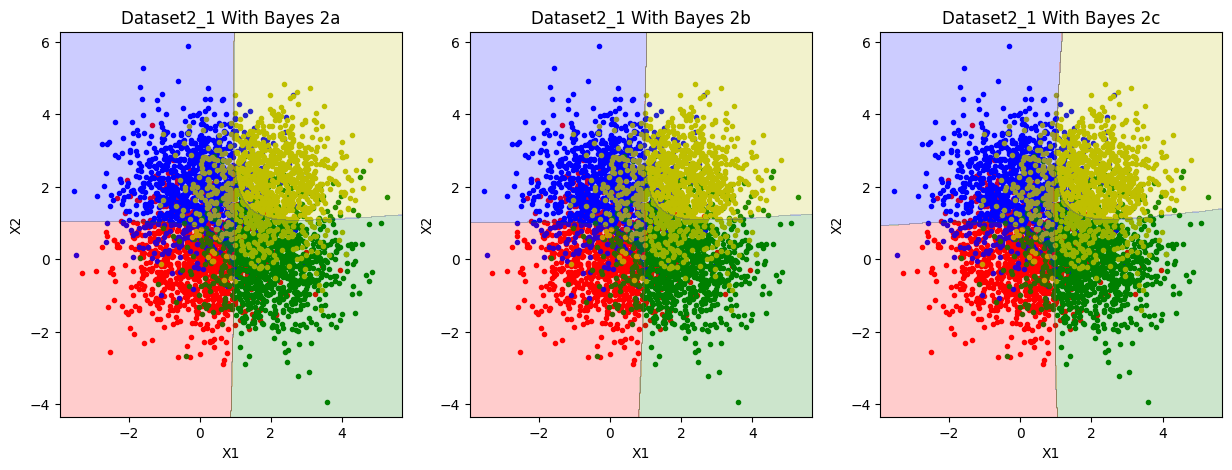

Dataset2_2 Error 2a: 0.1455 Error 2b: 0.16525 Error 2c: 0.10575
Expected loss 2a: 0.1835 Expected loss 2b: 0.1895 Expected loss 2c: 0.14075


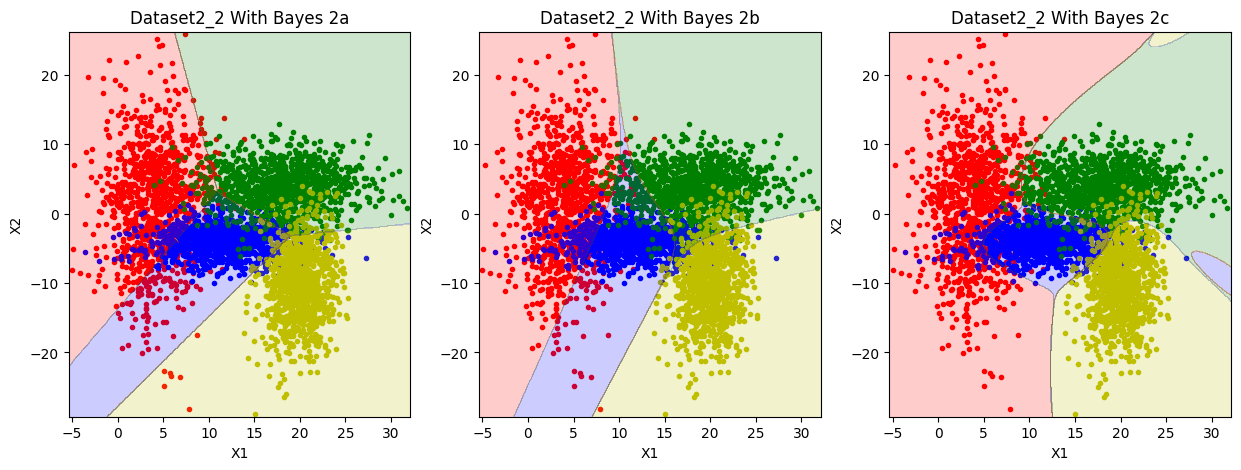

In [34]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def getConfusionMatrix(Y_test, Y_pred):
    confusion_matrix = np.zeros((4, 4), dtype=int)
    for i in range(Y_test.shape[0]):
        confusion_matrix[int(Y_test[i])-1][int(Y_pred[i])-1] += 1
    return confusion_matrix

markers = ['.', '.', '.', '.']
colors = ['r', 'b', 'g', 'y']
expected_loss_matrix = []
confusion_matrix_full = []

for i in range(1, 3):
    filename = 'dataset2_' + str(i) + '.npz'
    data = np.load(filename)

    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_test_pred1 = Bayes2a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes2b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes2c(X_train, Y_train, X_test)

    print("Dataset2_" + str(i), end="")
    print(" Error 2a:", (Y_test.shape[0] - np.sum(Y_test_pred1 == Y_test))/Y_test.shape[0], end="")
    print(" Error 2b:", (Y_test.shape[0] - np.sum(Y_test_pred2 == Y_test))/Y_test.shape[0], end="")
    print(" Error 2c:", (Y_test.shape[0] - np.sum(Y_test_pred3 == Y_test))/Y_test.shape[0])
    confusion_matrix = []
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred1))
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred2))
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred3))
    confusion_matrix_full.append(confusion_matrix)

    expected_loss = [0, 0, 0]
    for j in range(3):
        for k in range(4):
            for l in range(4):
                expected_loss[j] += confusion_matrix[j][k][l] * loss_matrix[k][l]
        expected_loss[j] /= Y_test.shape[0]
    expected_loss_matrix.append(expected_loss)

    print("Expected loss 2a:", expected_loss[0], end="")
    print(" Expected loss 2b:", expected_loss[1], end="")
    print(" Expected loss 2c:", expected_loss[2])

    plt.subplots(1, 3, figsize=(15, 5))
    size = 500
    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    
    X, Y = np.meshgrid(np.linspace(min_X-0.4, max_X+0.4, size), np.linspace(min_Y-0.4, max_Y+0.4, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]

    plt.subplot(1, 3, 1)
    plt.title("Dataset2_" + str(i) + " With Bayes 2a")
    for j in range(4):
        plt.scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j]) 

    Z = Bayes2a(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])

    plt.subplot(1, 3, 2)
    plt.title("Dataset2_" + str(i) + " With Bayes 2b")
    for j in range(4):
        plt.scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2b(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])

    plt.subplot(1, 3, 3)
    plt.title("Dataset2_" + str(i) + " With Bayes 2c")
    for j in range(4):
        plt.scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2c(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])

    plt.show()


In [35]:
# Pretty Printing (DONT SUMBIT THIS)

def markdown_table_print(table):
    for i in range(len(table)):
        print("|", end="")
        for j in range(len(table[i])):
            print(str(table[i][j]), end="|")
        print()

print("### Confusion Matrix for Dataset 2_1 with Bayes 2a")
markdown_table_print(confusion_matrix_full[0][0])
print("### Confusion Matrix for Dataset 2_1 with Bayes 2b")
markdown_table_print(confusion_matrix_full[0][1])
print("### Confusion Matrix for Dataset 2_1 with Bayes 2c")
markdown_table_print(confusion_matrix_full[0][2])
print("### Confusion Matrix for Dataset 2_2 with Bayes 2a")
markdown_table_print(confusion_matrix_full[1][0])
print("### Confusion Matrix for Dataset 2_2 with Bayes 2b")
markdown_table_print(confusion_matrix_full[1][1])
print("### Confusion Matrix for Dataset 2_2 with Bayes 2c")
markdown_table_print(confusion_matrix_full[1][2])

print("### Expected Loss")
markdown_table_print(expected_loss_matrix)

### Confusion Matrix for Dataset 2_1 with Bayes 2a
|633|219|136|12|
|97|738|62|103|
|86|49|770|95|
|15|136|194|655|
### Confusion Matrix for Dataset 2_1 with Bayes 2b
|633|218|137|12|
|95|743|60|102|
|84|49|773|94|
|16|137|196|651|
### Confusion Matrix for Dataset 2_1 with Bayes 2c
|634|217|138|11|
|99|742|61|98|
|87|47|772|94|
|15|134|201|650|
### Confusion Matrix for Dataset 2_2 with Bayes 2a
|830|150|18|2|
|93|784|46|77|
|30|61|905|4|
|0|23|78|899|
### Confusion Matrix for Dataset 2_2 with Bayes 2b
|891|106|3|0|
|119|691|124|66|
|23|106|864|7|
|0|5|102|893|
### Confusion Matrix for Dataset 2_2 with Bayes 2c
|901|80|19|0|
|64|824|46|66|
|19|31|936|14|
|0|36|48|916|
### Expected Loss
|0.42975|0.429|0.42775|
|0.1835|0.1895|0.14075|


** Cell type : TextWrite ** 

# Problem 2
## Observations
1. The Bayes2c classifier is the best among the 3 classifiers. It takes less number of assumptions and extracts all the information from the data itself.

2. We can see this in the second dataset with the misclassification error being the lowest for the Bayes2c classifier.

    
## Expected Loss Table
| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 2_1     |0.42975  |0.429    |  0.42775|
| 2_2     |0.1835   |0.1895   |  0.14075|

## Confusion Table
Table Organised as follows: Rows are the true labels, columns are the predicted labels.

### Bayes2a -> Dataset 2_1
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 633 | 219 | 136 | 12 |
| **2** | 97 | 738 | 62 | 103 |
| **3** | 86 | 49 | 770 | 95 |
| **4** | 15 | 136 | 194 | 655 |

### Bayes2b -> Dataset 2_1
| True/pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 633 | 218 | 137 | 12 |
| **2** | 95 | 743 | 60 | 102 |
| **3** | 84 | 49 | 773 | 94 |
| **4** | 16 | 137 | 196 | 651 |

### Bayes2c -> Dataset 2_1
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 634 | 217 | 138 | 11 |
| **2** | 99 | 742 | 61 | 98 |
| **3** | 87 | 47 | 772 | 94 |
| **4** | 15 | 134 | 201 | 650 |

### Bayes2a -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 830 | 150 | 18 | 2 |
| **2** | 93 | 784 | 46 | 77 |
| **3** | 30 | 61 | 905 | 4 |
| **4** | 0 | 23 | 78 | 899 |

### Bayes2b -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 891 | 106 | 3 | 0 |
| **2** | 119 | 691 | 124 | 66 |
| **3** | 23 | 106 | 864 | 7 |
| **4** | 0 | 5 | 102 | 893 |

### Bayes2c -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 901 | 80 | 19 | 0 |
| **2** | 64 | 824 | 46 | 66 |
| **3** | 19 | 31 | 936 | 14 |
| **4** | 0 | 36 | 48 | 916 |

## Misclassification Error Table
| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 2_1     |  0.301  |   0.3   |  0.3005 |
| 2_2     |  0.1455 | 0.16525 | 0.10575 |

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




In [ ]:
# Cell type : CodeWrite

def phi_2(x, degree):
    # x is a 2D array of shape (N, 2)
    # need heterogeneous polynomial features of degree 'degree'
    x_new = []
    for i in range(x.shape[0]):
        x_temp = []
        for j in range(degree+1):
            for k in range(degree+1):
                if j+k <= degree:
                    x_temp.append(x[i, 0]**j * x[i, 1]**k)
        x_new.append(x_temp)   
    return x_new

def generateYValues(x):
    y = np.zeros(x.shape[0])
    a = [0.5, 0.5]
    b = [-0.5, -0.5]
    c = [0.5, -0.5]
    for i in range(x.shape[0]):
        term1 = np.exp(-4 * np.dot(x[i]-a, x[i]-a))
        term2 = np.exp(-4 * np.dot(x[i]-b, x[i]-b))
        term3 = np.exp(-4 * np.dot(x[i]-c, x[i]-c))
        y[i] = term1 + term2 + term3
    return y

def generateYValue(x):
    a = [0.5, 0.5]
    b = [-0.5, -0.5]
    c = [0.5, -0.5]
    term1 = np.exp(-4 * np.dot(x-a, x-a))
    term2 = np.exp(-4 * np.dot(x-b, x-b))
    term3 = np.exp(-4 * np.dot(x-c, x-c))
    return term1 + term2 + term3

def calculate_bias_variance(w_matrix, degree):
    w_mean = np.mean(w_matrix, axis=0)
    bias = 0
    variance = 0
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    
    Z_mean = polynomial_regression_ridge_pred(X_matrix, w_mean, degree)
    for i in range(X_matrix.shape[0]):
        bias += (Z_mean[i] - generateYValue(X_matrix[i]))**2
    
    for i in range(w_matrix.shape[0]):
        Z = polynomial_regression_ridge_pred(X_matrix, w_matrix[i], degree)
        for j in range(X_matrix.shape[0]):
            variance += (Z[j] - Z_mean[j])**2

    bias /= X_matrix.shape[0]
    bias = np.sqrt(bias)
    variance /= X_matrix.shape[0]
    variance /= w_matrix.shape[0]
    return bias, variance

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    X_test_poly = phi_2(X_test, degree)
    X_test_poly = np.array(X_test_poly)
    Y_test_pred = np.matmul(X_test_poly, wt_vector)
    return Y_test_pred

    
def visualise_polynomial_2d(ax, wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    
    Z = polynomial_regression_ridge_pred(X_matrix, wt_vector, degree)
    Z = Z.reshape(X.shape[0], X.shape[1])
    
    contour = ax.contourf(X,Y,Z, cmap='coolwarm', levels=np.linspace(0, 1.2, 20))
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    return contour
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    X_train_poly = phi_2(X_train, degree)
    X_train_poly = np.array(X_train_poly)
    X_train_poly_transpose = np.transpose(X_train_poly)

    a = np.matmul(X_train_poly_transpose, X_train_poly)
    a += reg_param * np.eye(a.shape[0])
    b = np.matmul(X_train_poly_transpose, Y_train)
    w = np.matmul(np.linalg.inv(a), b)
    return w

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    # phi_size is the size of the feature vector (n+d)C(d)
    phi_size = (degree+2)*(degree+1)/2
    w_matrix = []

    for i in range(100):
        X_train = np.random.uniform(-1, 1, (num_training_samples, 2))
        Y_train = generateYValues(X_train)
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        Y_train_pred = polynomial_regression_ridge_pred(X_train, w, degree)
        w_matrix.append(w)

    w_matrix = np.array(w_matrix)
    w_mean = np.mean(w_matrix, axis=0)
    bias, variance = calculate_bias_variance(w_matrix, degree)

    fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle("Degree: " + str(degree) + " Lambda: " + str(reg_param), x=0.45, fontsize=16)

    contour = visualise_polynomial_2d(ax[0], w_mean, degree, "Average f_S")
    for i in range(3):
        visualise_polynomial_2d(ax[i+1], w_matrix[i], degree, "f_S" + str(i+1))

    plt.colorbar(contour, ax=ax.ravel().tolist())
    mse = bias**2 + variance
    return bias, variance, mse

bias_table = []
bias_table.append([" ", 1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3])
variance_table = []
variance_table.append([" ", 1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3])

for degree in [1,2,4,8,16]:
    bias_row = []
    bias_row.append(degree)
    variance_row = []
    variance_row.append(degree)
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        bias_row.append(b)
        variance_row.append(v)
        
        print('================================')
        print('Degree = '+str(degree)+' lambda = '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        plt.show()
    
    bias_table.append(bias_row)
    variance_table.append(variance_row)

In [ ]:
# Cell type: convenience
print('Bias Table')
print(bias_table)
print('Variance Table')
print(variance_table)

** Cell type: TextWrite **

# Problem 3
## Bias-Table
| Degree\reg_param | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 | 1e+03 |
|------------------|-------|-------|-------|-------|-------|-------|
| 1                | 0.23495684723 | 0.234757999409 | 0.235229835372 | 0.234828883849 | 0.257063782565 | 0.554183869191 |
| 2                | 0.186396877173 | 0.186576142627 | 0.186887171705 | 0.186938786828 | 0.248569973376 | 0.551227336691 |
| 4                | 0.0943979590244 | 0.0935629838865 | 0.0873341889325 | 0.0948055154585 | 0.244386348798 | 0.54984463158 |
| 8                | 0.0964886319504 | 0.0690485835789 | 0.0753995888442 | 0.0990385903964 | 0.235778555355 | 0.549218961995 |
| 16               | 0.112983354922 | 0.0929315159899 | 0.0926446898842 | 0.112731828572 | 0.23004111474 | 0.548907300906 |
## Variance-Table
| Degree\reg_param | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 | 1e+03 |
|------------------|-------|-------|-------|-------|-------|-------|
| 1                | 0.004477415536 | 0.003905284888 | 0.003688508933 | 0.00356953277 | 0.001556042612 | 7.30202327187e-06 |
| 2                | 0.005563960323 | 0.006656667102 | 0.005281787908 | 0.005543484598 | 0.002112927062 | 7.27287977861e-06 |
| 4                | 0.009361732367 | 0.009115843026 | 0.00756410872 | 0.00412451779 | 0.002571332343 | 1.05335835488e-05 |
| 8                | 0.210710194021 | 0.065173434689 | 0.019228837193 | 0.007592871971 | 0.002518703486 | 1.40026662445e-05 |
| 16               | 0.378517754743 | 0.187792151517 | 0.064819600589 | 0.013852340583 | 0.002735975743 | 1.58989652082e-05 |


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




In [ ]:
# Cell type : CodeWrite 

data = np.load("dataset4_1.npz")
X_train = data["arr_0"]
Y_train = data["arr_1"]
X_test = data["arr_2"]
Y_test = data["arr_3"]

test_sizes = [50, 100, 200, 1000]
degrees = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def phi_2(x, degree):
    # x is a 2D array of shape (N, 2)
    # need heterogeneous polynomial features of degree 'degree'
    x_new = []
    for i in range(x.shape[0]):
        x_temp = []
        for j in range(degree+1):
            for k in range(degree+1):
                if j+k <= degree:
                    x_temp.append(x[i, 0]**j * x[i, 1]**k)
        x_new.append(x_temp)   
    return x_new

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    X_test_poly = phi_2(X_test, degree)
    X_test_poly = np.array(X_test_poly)
    Y_test_pred = np.dot(X_test_poly, wt_vector)
    return Y_test_pred

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    X_train_poly = phi_2(X_train, degree)
    X_train_poly = np.array(X_train_poly)
    X_train_poly_transpose = np.transpose(X_train_poly)

    a = np.matmul(X_train_poly_transpose, X_train_poly)
    a += reg_param * np.eye(a.shape[0])
    b = np.matmul(X_train_poly_transpose, Y_train)
    w = np.matmul(np.linalg.inv(a), b)
    return w

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    
    Z = polynomial_regression_ridge_pred(X_matrix, wt_vector, degree)
    Z = Z.reshape(X.shape[0], X.shape[1])
    
    plt.contourf(X,Y,Z,levels=np.linspace(-1.,1. , 20))
    plt.title(title)
    plt.colorbar()
    plt.show()

train_mse_table_full = []
test_mse_table_full = []

for test_size in test_sizes:
    train_mse_table = []
    test_mse_table = []
    train_mse_table.append([" ", 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1])
    test_mse_table.append([" ", 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1])

    for degree in degrees:
        train_mse_row = [degree]
        test_mse_row = [degree]

        for reg_param in reg_params:
            X_train_sample = X_train[:test_size]
            Y_train_sample = Y_train[:test_size]

            w = polynomial_regression_ridge_train(X_train_sample, Y_train_sample, degree, reg_param)

            Y_train_pred = polynomial_regression_ridge_pred(X_train_sample, w, degree)
            Y_test_pred = polynomial_regression_ridge_pred(X_test, w, degree)

            train_mse = np.dot(Y_train_sample - Y_train_pred, Y_train_sample - Y_train_pred) / test_size
            test_mse = np.dot(Y_test - Y_test_pred, Y_test - Y_test_pred) / Y_test.shape[0]

            train_mse_row.append(train_mse)
            test_mse_row.append(test_mse)
            
        train_mse_table.append(train_mse_row)
        test_mse_table.append(test_mse_row)
    
    train_mse_table = np.array(train_mse_table, dtype=object)
    test_mse_table = np.array(test_mse_table, dtype=object)

    test_mse_only_values = test_mse_table[1:, 1:].astype(np.float64)
    min_test_mse = np.min(test_mse_only_values)
    min_test_mse_index = np.argmin(test_mse_only_values)
    min_test_mse_degree = test_mse_table[1:, 0][min_test_mse_index // 6]
    min_test_mse_reg_param = test_mse_table[0, 1:][min_test_mse_index % 6]
    print("Minimum test MSE: ", min_test_mse , " for test size: ", test_size)
    print("Degree: ", min_test_mse_degree)
    print("Regularization parameter: ", min_test_mse_reg_param)

    w = polynomial_regression_ridge_train(X_train, Y_train, min_test_mse_degree, min_test_mse_reg_param)
    visualise_polynomial_2d(w, min_test_mse_degree, "Degree: " + str(min_test_mse_degree) + ", Reg. param.: " + str(min_test_mse_reg_param))

    train_mse_table_full.append(train_mse_table)
    test_mse_table_full.append(test_mse_table)

In [ ]:
def markdown_table(table):
    """Convert a 2D array into a Markdown table."""
    return '\n'.join(['| ' + ' | '.join(row) + ' |' for row in table])

for i in range(len(test_sizes)):
    print("Test size: ", test_sizes[i])
    print("Train MSE table")
    print(markdown_table(train_mse_table_full[i]))
    print("Test MSE table")
    print(markdown_table(test_mse_table_full[i]))

** Cell type : TextWrite **

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










In [ ]:
# Cell type : CodeWrite 

# w ~ N([u1, u2], t^2 * I)
# e ~ N(0, sigma^2)
# y = w^T * x + e

def pdf_multivariate_gaussian(x, mu, cov):
    """
    Returns the probability density function of the multivariate Gaussian distribution.

    Args:
    x: an array of shape (d, 1)
    mu: an array of shape (d, 1)
    cov: an array of shape (d, d)

    Returns:
    p: the probability density function of the multivariate Gaussian distribution
    """
    x_minus_mu = x - mu
    x_minus_mu_transpose = np.transpose(x_minus_mu)
    cov_inverse = np.linalg.inv(cov)
    exponent = -0.5 * np.matmul(np.matmul(x_minus_mu_transpose, cov_inverse), x_minus_mu)
    const = 1 / (np.sqrt(np.linalg.det(cov)) * np.sqrt(2 * np.pi))
    return const * np.exp(exponent)


def pdf_gaussian(x, mu, sigma):
    """
    Returns the probability density function of the univariate Gaussian distribution.

    Args:
    x: a scalar
    mu: a scalar
    sigma: a scalar

    Returns:
    p: the probability density function of the Gaussian distribution
    """
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)




** Cell type : TextWrite **